<a href="https://colab.research.google.com/github/AdityaVerma2809/Machine-Learning/blob/main/Using_Data_Augmentation_Classifying_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*/*.jpg'))

[PosixPath('datasets/flower_photos/flower_photos/dandelion/6012046444_fd80afb63a_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/4610125337_50798408b8_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/4278757393_bca8415ed4_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/17280886635_e384d91300_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/8720503800_cab5c62a34.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/7808545612_546cfca610_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/4254850910_0610224342_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/8270191872_61e47ae3b8_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/468749497_951c571eff_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/4633323785_20676ff914_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/dandelion/4560663938_3557a1f831.jpg'),
 PosixPath('da

In [5]:
len(list(data_dir.glob('*/*/*.jpg')))

3670

In [6]:
image_count=len(list(data_dir.glob('*/*/*.jpg')))

In [7]:
roses=list(data_dir.glob('*/roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/9433167170_fa056d3175.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3045046293_57f6d52065_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16334786972_1b3e71cab8_m.jpg')]

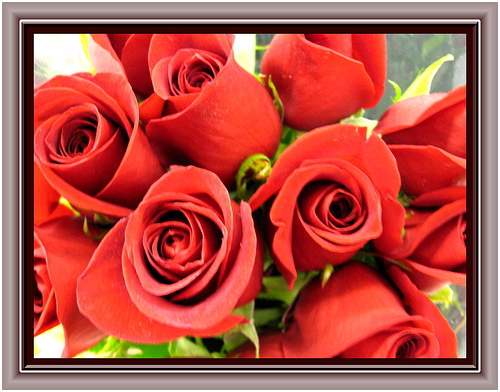

In [8]:
PIL.Image.open(str(roses[9]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [12]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [13]:
x,y=[],[]

for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [14]:
x=np.array(x)
y=np.array(y)

In [15]:
len(x)

3670

In [16]:
len(y)

3670

array([[[62, 38, 46],
        [62, 38, 46],
        [63, 39, 49],
        ...,
        [62, 38, 46],
        [60, 36, 44],
        [61, 35, 42]],

       [[61, 37, 45],
        [62, 38, 46],
        [63, 38, 46],
        ...,
        [62, 38, 46],
        [61, 37, 45],
        [61, 34, 43]],

       [[62, 38, 46],
        [62, 38, 46],
        [62, 38, 46],
        ...,
        [62, 38, 48],
        [61, 37, 45],
        [62, 35, 44]],

       ...,

       [[61, 33, 39],
        [60, 34, 41],
        [62, 35, 44],
        ...,
        [62, 32, 39],
        [63, 32, 37],
        [61, 31, 36]],

       [[62, 34, 40],
        [60, 34, 42],
        [61, 34, 43],
        ...,
        [61, 32, 38],
        [62, 32, 37],
        [60, 30, 35]],

       [[62, 34, 40],
        [60, 34, 40],
        [61, 34, 42],
        ...,
        [62, 32, 38],
        [61, 31, 36],
        [62, 31, 35]]], dtype=uint8)
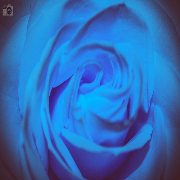

In [17]:
x[0]

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [19]:
len(x_train)

2752

In [20]:
len(y_train)

2752

In [21]:
len(y_test)

918

In [22]:
len(x_test)

918

In [23]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [24]:
x_train_scaled[0]

array([[[0.00392157, 0.09411765, 0.03529412],
        [0.00392157, 0.09803922, 0.0627451 ],
        [0.02352941, 0.11372549, 0.09019608],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.09411765, 0.04313725],
        [0.01176471, 0.10588235, 0.06666667],
        [0.02352941, 0.11764706, 0.08627451],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00392157, 0.09803922, 0.05490196],
        [0.01960784, 0.11764706, 0.07843137],
        [0.01960784, 0.12156863, 0.09019608],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.10196078, 0.0627451 ],
        [0.01176471, 0.10980392, 0.07058824],
        [0.01176471, 0

In [25]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3290 - loss: 1.6606
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5672 - loss: 1.0707
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6578 - loss: 0.8780
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7483 - loss: 0.6818
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8067 - loss: 0.5280
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8861 - loss: 0.3208
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9339 - loss: 0.2223
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9623 - loss: 0.1156
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9695 - loss: 0.0996
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9868 - loss: 0.0537
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9889 - loss: 0.0439
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy:

In [26]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6173 - loss: 3.4910


[3.1726322174072266, 0.6481481194496155]

In [28]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[ -2.2448092 ,   5.397225  ,   6.0054355 ,   1.4584262 ,
         -0.04533878],
       [ -0.18585975,   9.584198  ,   0.62579113,   3.053905  ,
         -2.0002835 ],
       [ 15.251276  ,  -0.2075631 ,   6.799575  , -17.965378  ,
          8.867365  ],
       ...,
       [ -9.101244  ,   8.196096  ,  14.96559   ,   9.749492  ,
         -4.2355785 ],
       [  1.8433751 ,  -0.56002015,  -0.64478034,   3.2845898 ,
          8.422079  ],
       [ -9.5509205 ,  -9.050231  ,  13.074312  ,  18.735325  ,
          0.8053366 ]], dtype=float32)

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


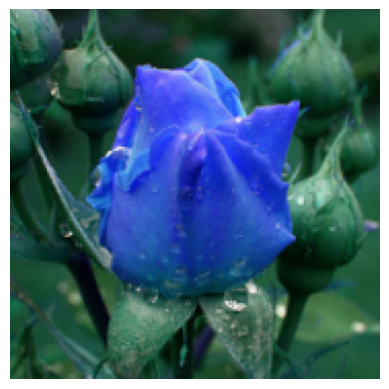

In [48]:
plt.axis('off')
plt.imshow(x[1])

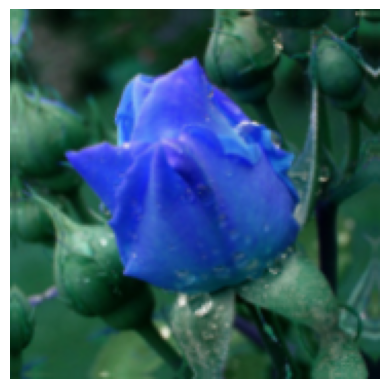

In [51]:
plt.axis('off')
plt.imshow(data_augmentation(x)[1].numpy().astype("uint8"))

In [52]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3280 - loss: 1.4871
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5663 - loss: 1.0770
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6416 - loss: 0.9285
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.6815 - loss: 0.8410
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7030 - loss: 0.8086
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7020 - loss: 0.7955
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7124 - loss: 0.7364
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7281 - loss: 0.7228
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7573 - loss: 0.6443
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7241 - loss: 0.6953
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7681 - loss: 0.6035
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy:

In [53]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7412 - loss: 0.9145


[0.861318826675415, 0.742919385433197]